In [27]:
#反爬：驗證碼處理
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pillow  #一个python的图像处理库，pytesseract依赖

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#一\u4e2apython的\u56fe像\u5904理\u5e93，pytesseract依\u8d56'


In [1]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

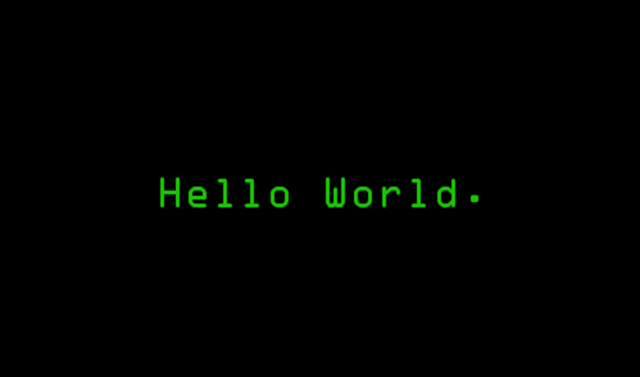

In [2]:
response = requests.get('https://i0.wp.com/www.embhack.com/wp-content/uploads/2018/06/hello-world.png')
img = Image.open(BytesIO(response.content))
img

In [3]:
code = pytesseract.image_to_string(img)
print(code)

Hello World-


In [5]:
img = Image.open("test/test1.png").convert("L")
code = pytesseract.image_to_string(img)
print(code)

619121


In [6]:
img = Image.open("test/test2.png").convert("L")
code = pytesseract.image_to_string(img)
print(code)

4413


In [7]:
#像 test/test2.png 這種複雜的圖片怎麼辦？
def binarizing(img,threshold): #input: gray image
    pixdata = img.load()
    w, h = img.size
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img

In [8]:
def depoint(img):   #input: gray image
    pixdata = img.load()
    w,h = img.size
    for y in range(1,h-1):
        for x in range(1,w-1):
            count = 0
            if pixdata[x,y-1] > 245:
                count = count + 1
            if pixdata[x,y+1] > 245:
                count = count + 1
            if pixdata[x-1,y] > 245:
                count = count + 1
            if pixdata[x+1,y] > 245:
                count = count + 1
            if count > 2:
                pixdata[x,y] = 255
    return img

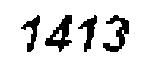

In [9]:
img = Image.open("test/test2.png").convert("L")
img = binarizing(img, 100)
img = depoint(img)
img

In [10]:
code = pytesseract.image_to_string(img)
print(code)

1413
